In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_row', 200)


## Importing The Dataset

In [2]:
df = pd.read_csv('heart_failure.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


## Dataset Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


The dataset contains only integers and float type features 

## Checking For Imbalance in Dataset 

0    67.892977
1    32.107023
Name: DEATH_EVENT, dtype: float64


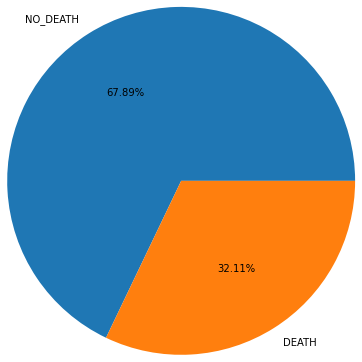

In [4]:
balance = (df['DEATH_EVENT'].value_counts()/len(df))*100
print(balance)
plt.pie(x = df['DEATH_EVENT'].value_counts(), labels = ['NO_DEATH','DEATH'], autopct = "%0.2f%%", radius = 2)
plt.show()

The Dataset is Imbalanced so we need to sort out this problem before feeding the data into ML model

## Exploratory Data Analysis

## Checking for Missing Values

In [5]:
null_values = [fe for fe in df.columns if df[fe].isnull().sum()>1]
null_values

[]

There is no missing values in the dataset

## Numerical Features


In [6]:
num = [fe for fe in df.columns if df[fe].dtype != 'O']
print(num)
print("There are {} numerical features in the dataset".format(len(num)))
df[num].head()

['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']
There are 13 numerical features in the dataset


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Discrete Features 

In [7]:
dis = [fe for fe in num if len(df[fe].unique()) < 20 and fe not in 'DEATH_EVENT']
print(dis)
print("There are {} discrete features in the dataset".format(len(dis)))
df[dis].head()

['anaemia', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'sex', 'smoking']
There are 6 discrete features in the dataset


,anaemia,diabetes,ejection_fraction,high_blood_pressure,sex,smoking
0,0,0,20,1,1,0
1,0,0,38,0,1,0
2,0,0,20,0,1,1
3,1,0,20,0,1,0
4,1,1,20,0,0,0


## Continuous Features

In [8]:
cont = [fe for fe in num if fe not in dis + ['DEATH_EVENT']]
print(cont)
print("There are {} continuous features in the dataset".format(len(cont)))
df[cont].head()

['age', 'creatinine_phosphokinase', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
There are 6 continuous features in the dataset


,age,creatinine_phosphokinase,platelets,serum_creatinine,serum_sodium,time
0,75.0,582,265000.00,1.9,130,4
1,55.0,7861,263358.03,1.1,136,6
2,65.0,146,162000.00,1.3,129,7
3,50.0,111,210000.00,1.9,137,7
4,65.0,160,327000.00,2.7,116,8


## VISUALIZING THE CONTINUOUS FEATURES

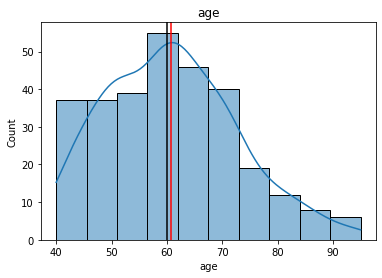

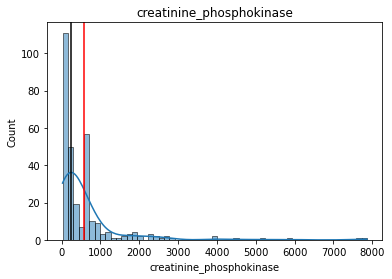

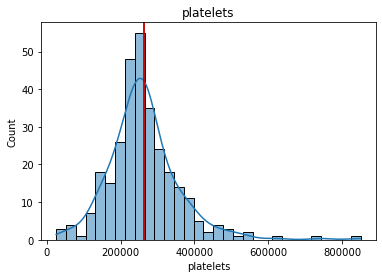

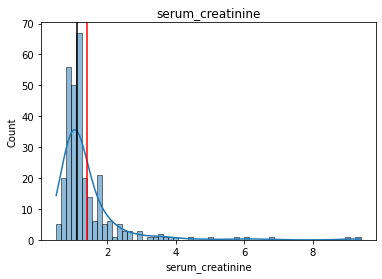

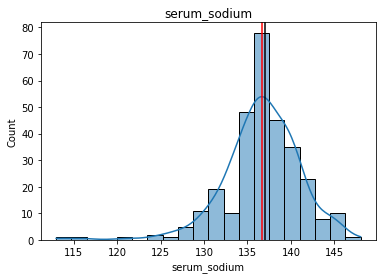

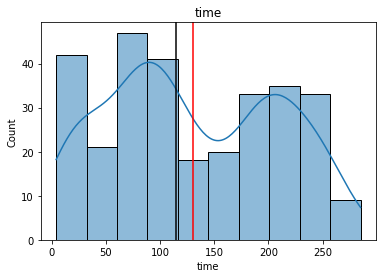

In [9]:
for i in cont:
    df_cont = df.copy()
    
    
    sns.histplot(data = df_cont[i], kde = True)
    plt.axvline(x = df_cont[i].median(), color = 'black')
    plt.axvline(x = df_cont[i].mean(), color = 'r')
    plt.xlabel(i)
    plt.title(i)
    plt.show()

There are outliers in some of the features, inorder to see the skewness of the features where mean is shown in red colour line and

median is shown in black colour line, creatinine_phosphokinase feature is right skewed where mean is higher than median, same

for serum_creatinine feature is right skewed and time feature is right skewed. The serum_sodium and Platelets are normal. distributed

In [10]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# Visualizing Discrete feature with traget feature

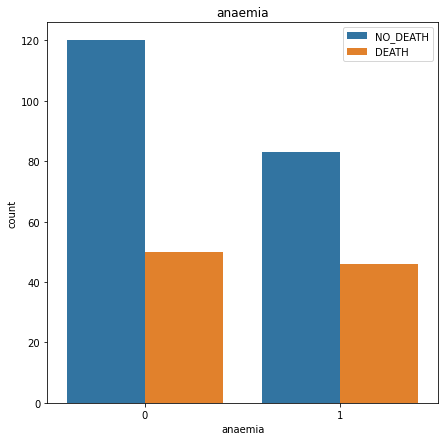

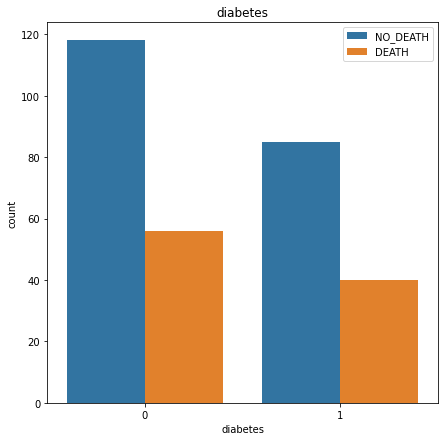

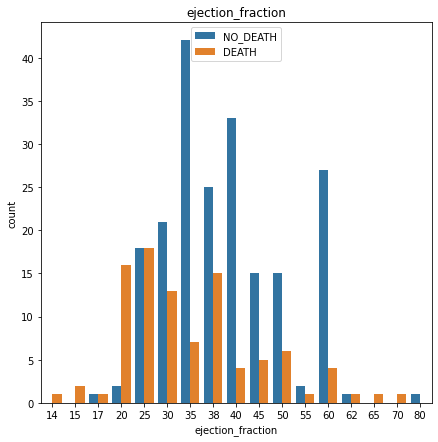

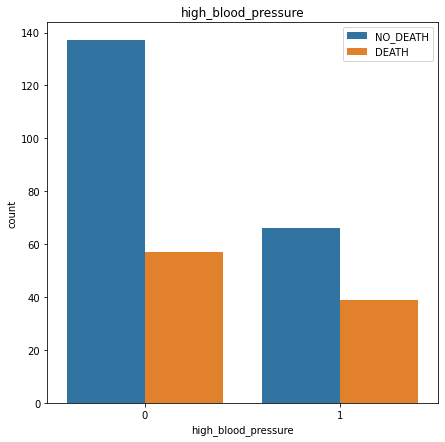

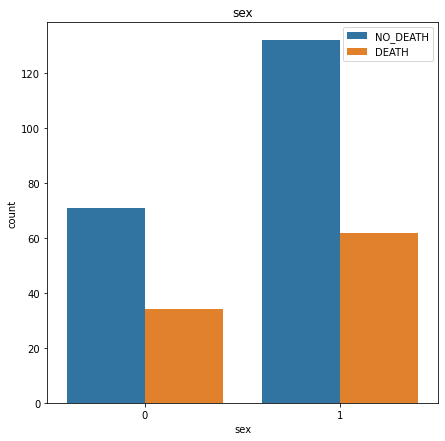

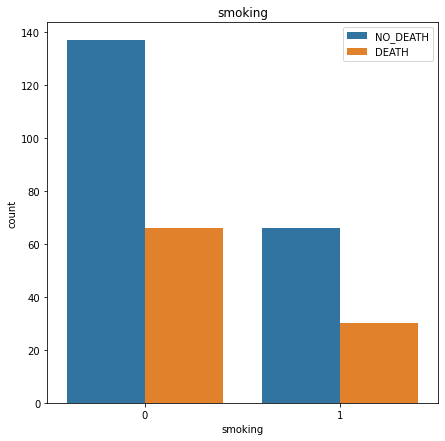

In [11]:
for i in dis:
    df_dis = df.copy()
    
    plt.figure(figsize=(7,7))
    sns.countplot(df_dis[i], hue = df['DEATH_EVENT'])
    plt.xlabel(i)
    plt.title(i)
    plt.legend(loc = 'best', labels=['NO_DEATH', 'DEATH'])
    plt.show()

# Splitting The Dataset

In [12]:
x = df.drop('DEATH_EVENT', axis = 1)
y = df['DEATH_EVENT']

y.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

The two class 0 and 1 are imbalanced, so we need to balance the dataset inorder achieve good results


# Balancing The Dataset

In [13]:
from imblearn.over_sampling import SMOTE

os = SMOTE('minority', random_state = 42)
x_res, y_res = os.fit_resample(x, y)

In [14]:
y_res.value_counts()

1    203
0    203
Name: DEATH_EVENT, dtype: int64

Synthetic Minority Over Sampling Technique(SMOTE) is used for balancing the dataset. The SMOTE use k-nearest neighbors technique 

for balancing the dataset

# Checking for imbalance 

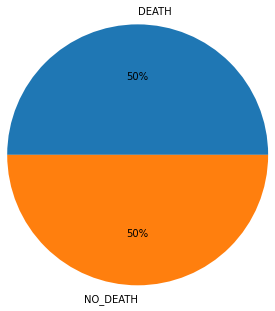

In [15]:
plt.pie(y_res.value_counts(), labels = ['DEATH','NO_DEATH'], autopct = '%d%%', radius = 1.5)
plt.show()

Now the dataset are completely balanced where class Death having 203 observation and class No_Death also having 203 observation

# Train and Test set Split

In [16]:
from sklearn.model_selection import train_test_split

train_set, test_set, train_label, test_label = train_test_split(x_res, y_res, test_size = 0.1, stratify=y_res, random_state = 52)

In [17]:
print('train_set shape : {}, train_labels shape: {} \ntest_set shape: {}, test_label: {}'.format(train_set.shape, train_label.shape,test_set.shape,test_label.shape ))

train_set shape : (365, 12), train_labels shape: (365,) 
test_set shape: (41, 12), test_label: (41,)


In [18]:
print('train_label_class(0 & 1)\n{},\ntest_label_class(0 & 1)\n{}'.format(train_label.value_counts(),test_label.value_counts()))

train_label_class(0 & 1)
0    183
1    182
Name: DEATH_EVENT, dtype: int64,
test_label_class(0 & 1)
1    21
0    20
Name: DEATH_EVENT, dtype: int64


The sklearn train_test_split is used. 

The stratify technique in the sklearn (train_test_split) split the data in equale class for training and test sets

In [19]:
df = train_set.copy()
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
365,51.838055,0,5964,0,27,1,384985.426424,1.683805,137,1,0,48
242,40.000000,0,90,0,35,0,255000.000000,1.100000,136,1,1,212
251,55.000000,0,572,1,35,0,231000.000000,0.800000,143,0,0,215
28,58.000000,1,60,0,38,0,153000.000000,5.800000,134,1,0,26
309,54.552696,0,1925,0,24,0,314372.753218,1.100000,137,1,0,202


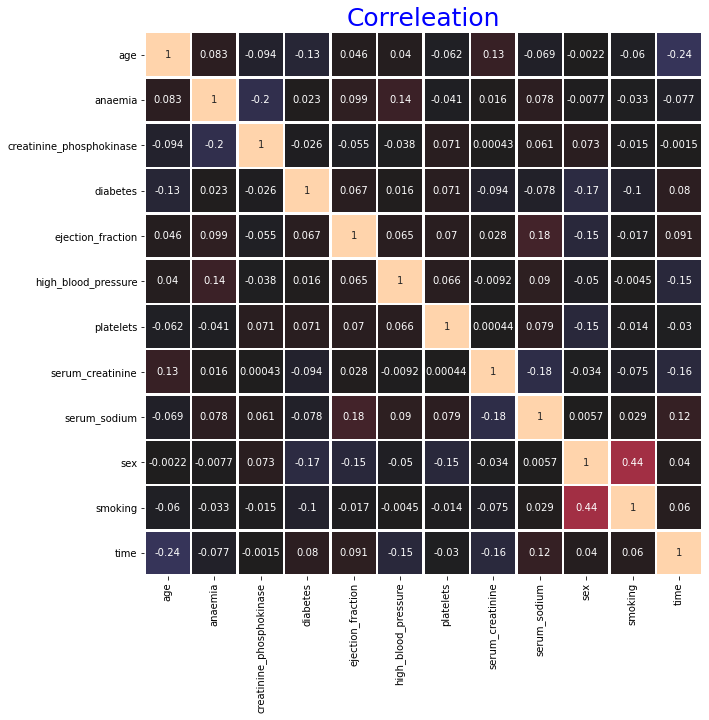

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), center = 0, annot = True, linecolor = 'white', linewidths = 1.5, cbar = False)
plt.title('Correleation', fontsize = 25, color = 'b')
plt.show()

# Feature Engineering

In [21]:
df['creatinine_phosphokinase'] = np.log(df['creatinine_phosphokinase'])

In [22]:
df['serum_creatinine'] = np.log(df['serum_creatinine'])
df['time'] = np.log(df['time'])

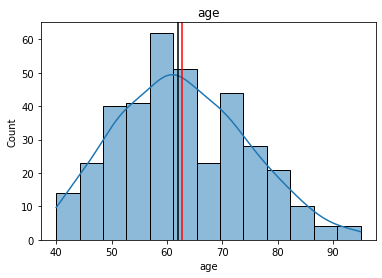

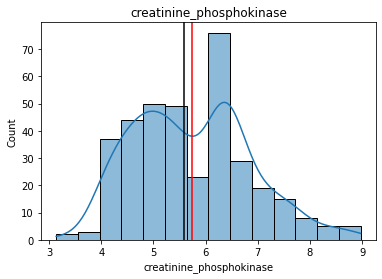

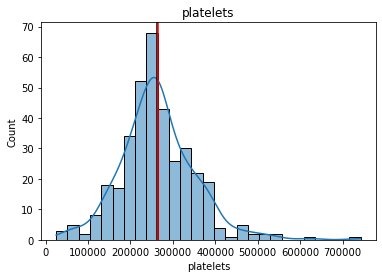

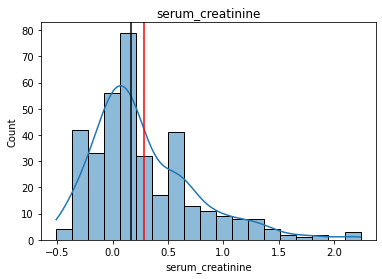

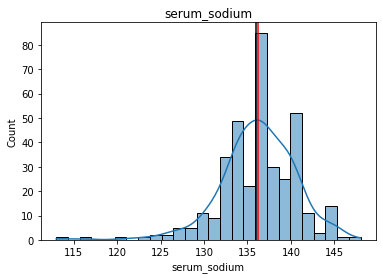

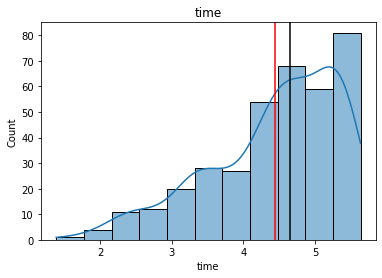

In [23]:
for i in cont:
    df_cont = df.copy()
    
    
    sns.histplot(data = df_cont[i], kde = True)
    plt.axvline(x = df_cont[i].median(), color = 'black')
    plt.axvline(x = df_cont[i].mean(), color = 'r')
    plt.xlabel(i)
    plt.title(i)
    plt.show()

In [24]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,62.732821,0.378082,5.735593,0.369863,36.564384,0.301370,264786.737344,0.280884,136.210959,0.591781,0.257534,4.435038
std,11.685166,0.485574,1.119655,0.483430,11.877088,0.459483,89083.172422,0.481005,4.350937,0.492179,0.437876,0.907700
min,40.000000,0.000000,3.135494,0.000000,14.000000,0.000000,25100.000000,-0.510826,113.000000,0.000000,0.000000,1.386294
25%,54.397140,0.000000,4.828314,0.000000,28.000000,0.000000,215000.000000,0.000000,134.000000,0.000000,0.000000,3.806662
50%,62.000000,0.000000,5.587249,0.000000,35.000000,0.000000,263358.030000,0.165514,136.000000,1.000000,0.000000,4.653960
75%,70.000000,1.000000,6.366470,1.000000,40.000000,1.000000,310000.000000,0.530628,139.000000,1.000000,1.000000,5.225747
max,95.000000,1.000000,8.969669,1.000000,80.000000,1.000000,742000.000000,2.240710,148.000000,1.000000,1.000000,5.634790


# Feature scaling

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([('std', StandardScaler()),])

train_pre = pipeline.fit_transform(df)

In [26]:
train_pre.shape

(365, 12)

# ML Model

In [49]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

In [50]:
from sklearn.model_selection import cross_val_score
cross_val_score(log_reg, train_pre, train_label, cv = 10, scoring = 'accuracy')

array([0.91891892, 0.86486486, 0.83783784, 0.89189189, 0.83783784,
       0.80555556, 0.80555556, 0.77777778, 0.91666667, 0.72222222])

In [51]:
from sklearn.model_selection import cross_val_predict

predict = cross_val_predict(log_reg, train_pre, train_label, cv = 10)

Text(33.0, 0.5, 'Actual')

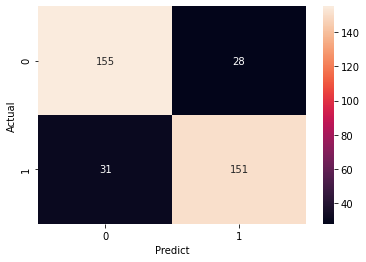

In [52]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(train_label, predict)
sns.heatmap(confusion, annot = True, xticklabels = [0,1], yticklabels = [0,1], fmt = '0.3g')
plt.xlabel('Predict')
plt.ylabel('Actual')

In [53]:
from sklearn.metrics import precision_score, recall_score,f1_score
print('precision {}'.format(precision_score(train_label, predict)))
print('recall {}'.format(recall_score(train_label,predict)))

precision 0.8435754189944135
recall 0.8296703296703297


In [54]:
f1_score(train_label, predict)

0.8365650969529086

In [55]:
predict_score = cross_val_predict(log_reg, train_pre, train_label, cv = 10, method = 'decision_function')


In [56]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(train_label, predict_score)

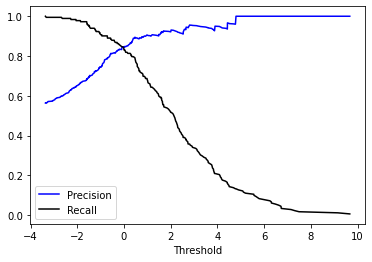

In [57]:
plt.plot(thresholds, precision[:-1], 'b-', label = 'Precision')
plt.plot(thresholds, recall[:-1], 'k-', label = 'Recall')
plt.legend(loc = 'best')
plt.xlabel('Threshold')
plt.show()

In [58]:
recall_90 = thresholds[np.argmax(recall >= 0.90)]

In [59]:
train_predict_90 = (predict_score >= recall_90)

In [60]:
precision_score(train_label, train_predict_90)

0.5634674922600619

In [61]:
recall_score(train_label, train_predict_90)

1.0

In [62]:
f1_score(train_label, train_predict_90)

0.7207920792079208

In [63]:
from sklearn.metrics import fbeta_score

fbeta_score(train_label,train_predict_90, average=None, beta=2)

array([0.27131783, 0.86584206])

In [64]:
chart = pd.DataFrame({'Precision': precision[:-1], 'Recall': recall[:-1], 'Thresholds': thresholds})
chart.head()

,Precision,Recall,Thresholds
0,0.563467,1.000000,-3.362199
1,0.562112,0.994505,-3.332637
2,0.563863,0.994505,-3.328022
3,0.565625,0.994505,-3.286998
4,0.567398,0.994505,-3.280894


In [65]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(train_label,predict_score)

In [66]:
chart = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr, 'Thresholds': thresholds})
chart.head()

,False Positive Rate,True Positive Rate,Thresholds
0,0.000000,0.000000,10.664811
1,0.000000,0.005495,9.664811
2,0.000000,0.131868,4.794751
3,0.005464,0.131868,4.770288
4,0.005464,0.159341,4.429774


Text(0, 0.5, 'True Positive Rate (Recall)')

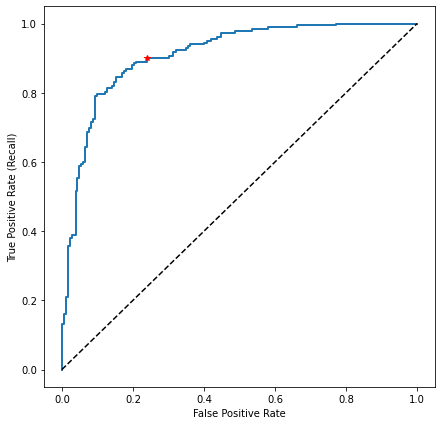

In [67]:
plt.figure(figsize=(7,7))
plt.plot(fpr, tpr, linewidth = 2)
plt.plot([0,1],[0,1], 'k--')
plt.plot([0.24],[0.90], 'r*')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')


In [68]:
con = confusion_matrix(train_label, train_predict_90)

Text(33.0, 0.5, 'Actual')

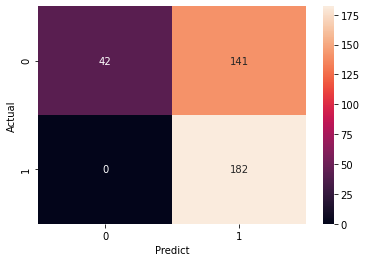

In [69]:
sns.heatmap(con, annot = True, xticklabels = [0,1], yticklabels = [0,1], fmt = '0.3g')
plt.xlabel('Predict')
plt.ylabel('Actual')

In [70]:
from sklearn.metrics import roc_auc_score

roc_auc_score(train_label,predict_score)

0.9102263856362216